# Problem Statement :
- Our client **X Education** sells online courses to industry professionals. Professionals visit their website and explore available online course on a daily basis. Our client promotes their website and courses on varoius websites as well as on several search engines like Google, Bing, Yahoo etc. using ad campaigns in which the interested target audience and potential customers fill a form or watch a promotional video and share their contact details like phone number and email ids for furthur information and discussion. Those customers are knows as **Leads** Also, Word-of-mouth marketing plays a huge role in lead generation for our client. 

- Employees from the sales team approach these leads via emails, phone calls, text messages etc. Some of these **leads, around 30%** in our client's case, are **converted** which is a very **poor conversion rate**.

- There are a lot of leads generated in the initial stage (social media marketing and search engine marketing) but only a few of them come out as paying customers from the bottom. If we demonostarte the entire process in a diagram and keep the 1st step on top and converted leads at bottom it would look like a funnel. In the middle stage, we nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

- So, to make this process more efficinet the X education company wants to **identify** the most potential leads, also, known as **Hot Leads**. If they successfully identify this set of leads, the lead **conversion rate should go up** as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

- Our job here is to **help them select the most promising leads**, i.e. the leads that are most likely to convert into paying customers. 


##### Our Goals in Layman's Language :
- To **build a model** wherein you need to **assign a lead score to each of the leads** such that the customers with **higher lead score** have a **higher conversion chance** and the customers with **lower lead score** have a **lower conversion chance**. The CEO, in particular, has given a ballpark of the **target lead conversion rate to be around 80%**.



# Data :
- We have been provided with a **leads dataset** from the past which consists of various **attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity**, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. 
- The **target variable, in this case, is the column ‘Converted’** which tells whether a past lead was converted or not wherein **1 means it was converted and 0 means it wasn’t converted**. 

- We also need to check out for are the **levels present in the categorical variables**. Many of the **categorical variables have a level called 'Select'** which needs to be handled because it is as good as a null value. SO, we may have to replace them with 'Nan'.

# Goals :
There are quite a few goals for this case study.

- We need to build a logistic regression model to **assign a lead score between 0 and 100 to each of the leads** which can be used by the company to target potential leads. **A higher score would mean that the lead is hot**, i.e. is most likely to convert whereas a **lower score** would mean that the lead is cold and **will mostly not get converted**.
- There are some **more problems** presented by the company which our model should be able to adjust to **if the company's requirement changes in the future**.So we will fill these problems which are provided in a **separate doc file**. It should be **based on** the **logistic regression model** we got in the **first step**. Also,we need to include this in our **final PPT** where you'll make **recommendations.

# Steps to follow:
- Reading and Understanding the Data
- Data Cleaning
- Exploratory Data Analysis
- Data Preparation
- Model Building
- Model Evaluation

## Step-1: Reading And Understanding the Data:


In [789]:
# Libraries to read and clean data
import numpy as np
import pandas as pd

# Libraries for data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [790]:
# Load and Read the csv file
leads = pd.read_csv("Leads.csv", sep=",", encoding="ISO-8859-1", header=0)

# Checking First Five records of the dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [791]:
# Checking the basic information of dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**We have 9240 rows and 37 columns. Looks like we have a lot of categorical variables, also have few null values.**

In [792]:
# Checking the statistical distribution of numerical features
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**We also, have some numerical features which have few outliers. We will deal with them in the upcoming steps.**

In [793]:
# Checking summary for all the 37 columns in the dataset
leads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [794]:
#Checking the % of null values in each column
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [795]:
#Checking for duplicates in the datatset
#Using the DataFrame.duplicated().sum() method to return the count of boolean value 'True'
bool_series = leads.duplicated().sum()
bool_series

0

#### Insights :
- There are total **9240 rows** and **37 columns**.
- **"Converted"** is our **target variable**.
- There are few **outliers present** in our dataset.
- There are a **few columns** with **more than 30% of missing values**.
- We have **no duplicated data** in our dataset.

## Step-2 : Data Cleaning :

In [796]:
#Let's look at the missing value percentage again
#Checking the % of null values in each column
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

- **The columns** : Asymmetrique Activity Index, Asymmetrique Profile Score, Asymmetrique Activity Score, Asymmetrique Profile Index, describe - **An index and score assigned to each customer based on their activity and their profile** which is **not an important factor** in our scenario. Also, each of them have around **46% of missing values**. Let's **drop these columns**.
- The column **"Lead Quality"** has around **52% missing values** , and we cannot delete these data by row as we'll loose more than half of our records. So, It's better to **drop the column** itself.
- The column **"Tags"** has **missing value around 36.29%**. The column's description says - "Tags assigned to customers indicating the current status of the lead." which is **not an important factor** for us. So, let's **drop** this column as well.
- The columns **Last Activity** and **Last Notable Activity** doesn't look important either. So, let's **drop them** as well.

In [797]:
# Getting the name of columns
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [798]:
# Dropping above mentioned columns
leads.drop(['Lead Quality', 'Asymmetrique Activity Index', 
                      'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index',
        'Tags', 'Last Activity'], 
        axis = 1, inplace = True)

In [799]:
# Missed "Last Notable Activity" column, so let's drop that column separately
#leads.drop(['Last Notable Activity'],axis = 1, inplace = True)

In [800]:
# Dropping columns after going through data dictionary which don't have much of a role in our current goal.
leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque',
            'Get updates on DM Content','Update me on Supply Chain Content','A free copy of Mastering The Interview'], 
           axis = 1, inplace = True)
leads.shape

(9240, 24)

**Now, the shape of our dataset is 9240 rows and 23 columns after dropping 8 columns**.


In [801]:
# Let's check the null count % again
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Lead Source                                       0.39
Newspaper Article                                 0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Prospect ID                                       0.00
Search                                            0.00
Lead Number                                       0.00
Total Time

**There are still few columns which have missing values** . Let's look at them one by one and see what can we do about them.

In [802]:
# Let's start with "What matters most to you in choosing a course" column
leads["What matters most to you in choosing a course"].value_counts(normalize = True, dropna = False) * 100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

**As we can see, Better career prospects + null values = approx 100% of the total column data**. Meaning, maximum of the leads are looking forward to improving their career prospect. Also, this column is nor relevant. It is looking safe to drop this column as well.

In [803]:
leads.drop(["What matters most to you in choosing a course"], axis = 1, inplace = True)

In [804]:
leads.shape

(9240, 23)

#### Let's look at the categorical columns with missing values one by one
- We can first see there value counts.
- Then, we can decide how to deal with them.

In [806]:
# Let's look at the columns and their datatypes first
leads.dtypes

Prospect ID                            object
Lead Number                             int64
Lead Origin                            object
Lead Source                            object
Do Not Email                           object
Do Not Call                            object
Converted                               int64
TotalVisits                           float64
Total Time Spent on Website             int64
Page Views Per Visit                  float64
Country                                object
Specialization                         object
How did you hear about X Education     object
What is your current occupation        object
Search                                 object
Newspaper Article                      object
X Education Forums                     object
Newspaper                              object
Digital Advertisement                  object
Through Recommendations                object
Lead Profile                           object
City                              

In [807]:
# Let's check the null count % again
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

Lead Profile                          29.32
What is your current occupation       29.11
Country                               26.63
How did you hear about X Education    23.89
Specialization                        15.56
City                                  15.37
TotalVisits                            1.48
Page Views Per Visit                   1.48
Lead Source                            0.39
Newspaper Article                      0.00
Through Recommendations                0.00
Digital Advertisement                  0.00
Newspaper                              0.00
X Education Forums                     0.00
Prospect ID                            0.00
Search                                 0.00
Lead Number                            0.00
Total Time Spent on Website            0.00
Converted                              0.00
Do Not Call                            0.00
Do Not Email                           0.00
Lead Origin                            0.00
Last Notable Activity           

In [808]:
# Value Count for column 'Lead Profile'
leads["Lead Profile"].value_counts(normalize = True, dropna = False) * 100

Select                         44.870130
NaN                            29.318182
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

- We can see Maximum of the records are left with 'Select' or have missing values.
- 'Select' level meaning the none of the options were chosen.
- 'Select' is as good as 'NaN'.
- We can fill all the 'Select' values with 'NaN'

In [809]:
# Let's convert all the 'Select' into NaN
leads = leads.replace('Select', np.nan)

In [810]:
# Let's check Value Count for column 'Lead Profile' again!
leads["Lead Profile"].value_counts(normalize = True, dropna = False) * 100

NaN                            74.188312
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

- So, the missing value % is around 75%. This column is of no use to us with that much of missing values.
- Let's drop this column as well.|


In [811]:
# Dropping 'Lead Profile'
leads.drop(["Lead Profile"], axis = 1, inplace = True)

In [812]:
# Let's check the null count % again
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

How did you hear about X Education    78.46
City                                  39.71
Specialization                        36.58
What is your current occupation       29.11
Country                               26.63
TotalVisits                            1.48
Page Views Per Visit                   1.48
Lead Source                            0.39
Search                                 0.00
Through Recommendations                0.00
Digital Advertisement                  0.00
Newspaper                              0.00
X Education Forums                     0.00
Newspaper Article                      0.00
Prospect ID                            0.00
Lead Number                            0.00
Total Time Spent on Website            0.00
Converted                              0.00
Do Not Call                            0.00
Do Not Email                           0.00
Lead Origin                            0.00
Last Notable Activity                  0.00
dtype: float64

In [813]:
# Let's drop 'How did you hear about X Education' column with 78.5% missing values
leads.drop(["How did you hear about X Education"], axis = 1, inplace = True)

 **Let's drop Prospect ID and Lead Number as well , because they don't have any relevance here.**

In [814]:
leads.drop(["Prospect ID","Lead Number"], axis = 1, inplace = True)

In [815]:
# Value Count for column 'What is your current occupation'
leads["What is your current occupation"].value_counts(normalize = True, dropna = False) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

- We can see most of the leads are 'Unemployed'
- There are around 30% 'Nan' values.
- Here, we can combine the minor categories into one category

In [816]:
# Let's rename the column first for our convenience
leads.rename(columns = {'What is your current occupation':'occupation'}, inplace = True)

In [817]:
# combine low representing categories
leads.loc[(leads.occupation == 'Student') | (leads.occupation == 'Other') | (leads.occupation == 'Housewife') | 
       (leads.occupation == 'Businessman') , 'occupation'] = 'Student and Others'
# Let's check the Value Count for column 'What is your current occupation' again 
leads["occupation"].value_counts(normalize = True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student and Others       3.725191
Name: occupation, dtype: float64

In [818]:
# Let's impute the NaN values proportionately
leads['occupation'] = leads.occupation.fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(leads))))

In [819]:
# Value Count for column 'Country'
leads["Country"].value_counts(normalize = True, dropna = False) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

- 70% of records have value as 'India' and 'NaN' values are around 27%

In [820]:
# We can drop this column as it doesn't seem that important and highest
leads.drop(["Country"], axis = 1, inplace = True)

In [821]:
# Value Count for column 'Specialization'
leads["Specialization"].value_counts(normalize = True, dropna = False) * 100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

- Here as well, We have maximum number of data as 'Nan'
- We can see a few management courses, a few business related courses and a few other industry courses.
- We can combine them into 3 different categories first, then we can impute values to 'NaN'

In [822]:
# let's categorize all management courses as 'Management Specialization'
leads.loc[(leads.Specialization == 'Finance Management') | (leads.Specialization == 'Human Resource Management') | 
       (leads.Specialization == 'Marketing Management') |  (leads.Specialization == 'Operations Management') |
       (leads.Specialization == 'IT Projects Management') | (leads.Specialization == 'Supply Chain Management') |
       (leads.Specialization == 'Healthcare Management') | (leads.Specialization == 'Hospitality Management') |
       (leads.Specialization == 'Retail Management') , 'Specialization'] = 'Management Specializations'

# let's categorize all busines courses as 'Business Specialization'
leads.loc[(leads.Specialization == 'Business Administration') | (leads.Specialization == 'International Business') | 
       (leads.Specialization == 'Rural and Agribusiness') | (leads.Specialization == 'E-Business') 
        , 'Specialization'] = 'Business Specializations'

# let's categorize all industry courses as 'Industry Specialization'
leads.loc[(leads.Specialization == 'Banking, Investment And Insurance') | (leads.Specialization == 'Media and Advertising') |
       (leads.Specialization == 'Travel and Tourism') | (leads.Specialization == 'Services Excellence') |
       (leads.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Industry Specializations'

# Let's see the Value Count for column 'Specialization' again !
leads["Specialization"].value_counts(normalize = True) * 100

Management Specializations    72.576792
Industry Specializations      15.290102
Business Specializations      12.133106
Name: Specialization, dtype: float64

In [823]:
# Let's impute NaN values proportionately
leads['Specialization'] = leads.Specialization.fillna(pd.Series(np.random.choice(['Management Specializations',  
                                                    'Business Specializations', 'Industry Specializations'], 
                                                                   p = [0.7258, 0.1213, 0.1529 ], size = len(leads))))


In [824]:
# Let's see the Value Count for column 'Specialization' again !
leads["Specialization"].value_counts(normalize = True) * 100

Management Specializations    72.770563
Industry Specializations      15.216450
Business Specializations      12.012987
Name: Specialization, dtype: float64

In [825]:
# Value Count for column 'City'
leads["City"].value_counts(normalize = True, dropna = False) * 100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

- There are a few categories we can see here. Mumbai, Thane and Outskirts(which is in Maharashtra), Other cities of Maharashtra, other cities, other metro cities, Tire II cities.
- We can categorize all of these into three categories. one Mumbai, second Non Mumbai Maharshtra cities and third, Non Maharshtra cities.

In [826]:
# categorize all non-mumbai, but Maharashtra cities
leads.loc[(leads.City == 'Thane & Outskirts') | (leads.City == 'Other Cities of Maharashtra'), 
       'City'] = 'Non-Mumbai Maharashtra Cities'

# categorize all other cities
leads.loc[(leads.City == 'Other Cities') | (leads.City == 'Other Metro Cities') | (leads.City == 'Tier II Cities') , 
       'City'] = 'Non-Maharashtra Cities'

In [827]:
# Let's see the value counts again !
leads["City"].value_counts(normalize = True) * 100

Mumbai                           57.835218
Non-Mumbai Maharashtra Cities    21.701669
Non-Maharashtra Cities           20.463113
Name: City, dtype: float64

In [828]:
# Let's impute the 'NaN' values using random choice
leads['City'] = leads.City.fillna(pd.Series(np.random.choice(['Mumbai',  
                                                    'Non-Mumbai Maharashtra Cities', 'Non-Maharashtra Cities'], 
                                                                   p = [0.5784, 0.2170, 0.2046 ], size = len(leads))))

In [829]:
# Value Count for column 'Lead Source'
leads["Lead Source"].value_counts(normalize = True, dropna = False) * 100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

- The column looks kind of clean with only 0.3% of 'NaN' values
- We can drop the rows with NaN values as the count is very low.

In [830]:
# Dropping the null value rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [831]:
# Let's see the null value counts again and see if we left something
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

TotalVisits                    1.41
Page Views Per Visit           1.41
Lead Origin                    0.00
Search                         0.00
City                           0.00
Through Recommendations        0.00
Digital Advertisement          0.00
Newspaper                      0.00
X Education Forums             0.00
Newspaper Article              0.00
occupation                     0.00
Lead Source                    0.00
Specialization                 0.00
Total Time Spent on Website    0.00
Converted                      0.00
Do Not Call                    0.00
Do Not Email                   0.00
Last Notable Activity          0.00
dtype: float64

In [832]:
# Dropping the null value rows in the column 'Total Visits' as the percentage is too low here too
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [833]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [834]:
# categorize all other cities
leads.loc[(leads['Last Notable Activity'] == 'Email Bounced') | (leads['Last Notable Activity'] == 'Unsubscribed') | (leads['Last Notable Activity'] == 'Unreachable') | (leads['Last Notable Activity'] == 'Had a Phone Conversation')
          |(leads['Last Notable Activity'] == 'Email Marked Spam') | (leads['Last Notable Activity'] == 'Approached upfront')| (leads['Last Notable Activity'] == 'Resubscribed to emails')| (leads['Last Notable Activity'] == 'View in browser link Clicked')
          | (leads['Last Notable Activity'] == 'Form Submitted on Website') | (leads['Last Notable Activity'] == 'Email Received'), 
       'Last Notable Activity'] = 'Other Activities'
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other Activities            158
Name: Last Notable Activity, dtype: int64

 **Let's check a few other categorical columns and their value counts**

In [835]:
# Value counts for 'Do Not Call' column
leads["Do Not Call"].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [836]:
# Value counts for 'Do Not Email' column
leads["Do Not Email"].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [837]:
# Value counts for 'Search' column
leads.Search.value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [838]:
# Value counts for 'Newspaper Article' column
leads["Newspaper Article"].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [839]:
# Value counts for 'X Education Forums' column
leads['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [840]:
# Value counts for 'Newspaper' column
leads['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [841]:
# Value counts for 'Digital Advertisement' column
leads['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [842]:
# Value counts for 'Through Recommendations' column
leads['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

#### Insights :

- The above 8 columns have two categories only , Yes/No.
- And among those two, in almost all of the columns the category level has value count more than 85% as 'No'
- And these columns serve no purpose in our goal.
- So, We can safely remove these column

In [843]:
leads.drop(["Do Not Call", "Do Not Email","Search","Through Recommendations","Digital Advertisement","Newspaper","X Education Forums","Newspaper Article"], axis = 1, inplace = True)

In [844]:
# Let's see the null value counts again for the final time
round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending=False)

Lead Origin                    0.0
Lead Source                    0.0
Converted                      0.0
TotalVisits                    0.0
Total Time Spent on Website    0.0
Page Views Per Visit           0.0
Specialization                 0.0
occupation                     0.0
City                           0.0
Last Notable Activity          0.0
dtype: float64

In [845]:
# Let's check the shape of our Clean dataset
leads.shape

(9074, 10)

In [846]:
# Let's check the percentage of rows that we have retained.
print(len(leads.index))
print(len(leads.index)/9240)

9074
0.982034632034632


### Insights:
- We started with 9240 rows and 37 columns. Now, after data cleaning we have **9074 rows and 10 columns** with zero missing values.
- We **removed a few of irrelevant features** according to data dictionary and our understanding.
- We have **imputed missing values** "NaN" using random choice propertionality method.
- We have **combined a few levels of some categorical variables** and **created levels which are easy to understand and interpret**.
- We have **retained around 98% of our original data**.
- Now, we can move on to the next step of our project.

## Step 3: Data Visualization:

In [847]:
# Let's import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [848]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9074 non-null   object 
 1   Lead Source                  9074 non-null   object 
 2   Converted                    9074 non-null   int64  
 3   TotalVisits                  9074 non-null   float64
 4   Total Time Spent on Website  9074 non-null   int64  
 5   Page Views Per Visit         9074 non-null   float64
 6   Specialization               9074 non-null   object 
 7   occupation                   9074 non-null   object 
 8   City                         9074 non-null   object 
 9   Last Notable Activity        9074 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 779.8+ KB


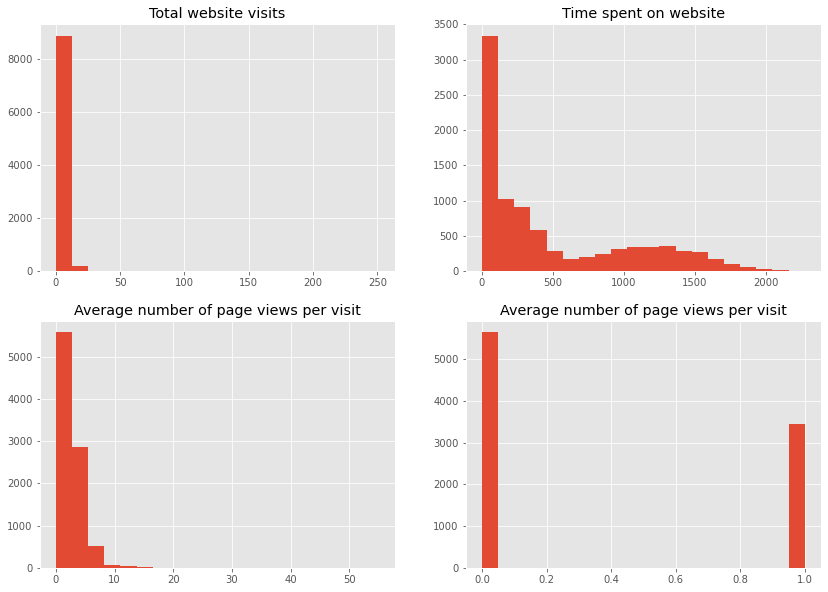

In [849]:
# Let's look at the pair plot among numerical features from our final and clean datatset
# Set style
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(leads.TotalVisits, bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(leads["Total Time Spent on Website"], bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(leads["Page Views Per Visit"], bins = 20)
plt.title('Average number of page views per visit')

plt.subplot(2, 2, 4)
plt.hist(leads["Converted"], bins = 20)
plt.title('Average number of page views per visit')

plt.show()

- As we can see, there are a few high peaks and looks like the data is skewed. There might be a possibility of outliers. We will do outlier treatment next.

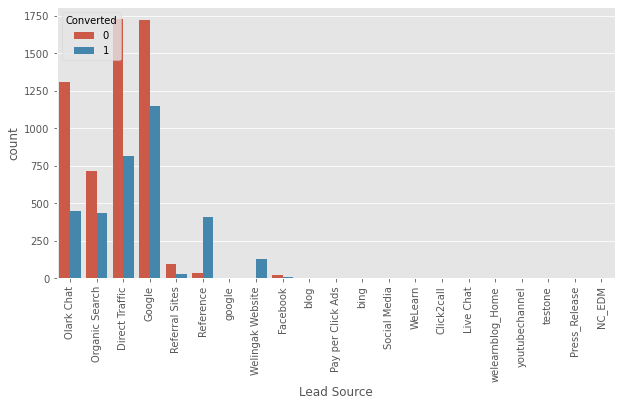

In [850]:
# Let's plot for categorical features against our target variable 'Converted' one by one
# Lead Source Vs Converted
plt.figure(figsize=(10,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Highest converted leads are from 'Google' and lowest are from 'Referral Sites' .
- We can also see, Direct traffic has given good conversion rate too.
- There is definitely room for improvement in case of Olark Chat, Organic search and Welingak websites.

In [851]:
leads.City.value_counts()

Mumbai                           5283
Non-Mumbai Maharashtra Cities    1959
Non-Maharashtra Cities           1832
Name: City, dtype: int64

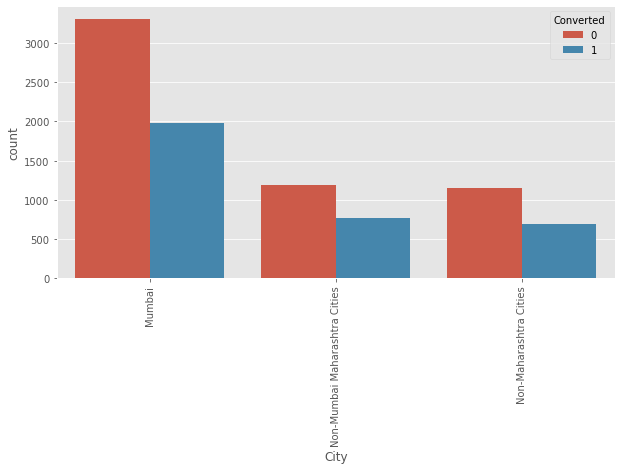

In [852]:
# City Vs Converted
plt.figure(figsize=(10,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Most of the converted leads are from Mumbai City.
- However, if the company focuses on Non Maharashtra cities, the conversion rate might go higher.

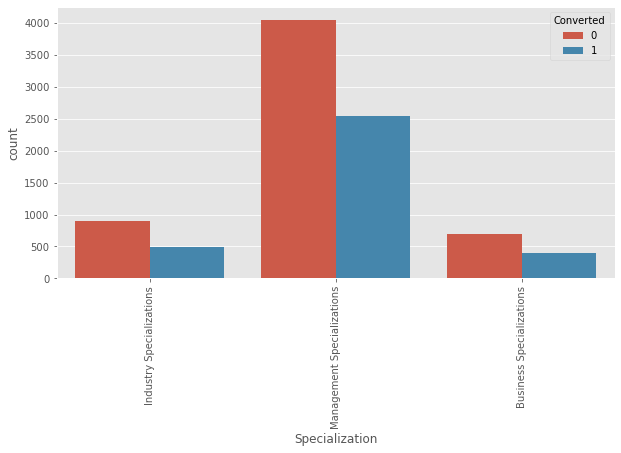

In [853]:
# Spcialization Vs Converted
plt.figure(figsize=(10,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- More than 50% of the converted Leads opted for 'Management Type Specializations'.
- The Company can introduce more career enhancement and industry relevant programs on the other two category to improvise the conversion rate here.

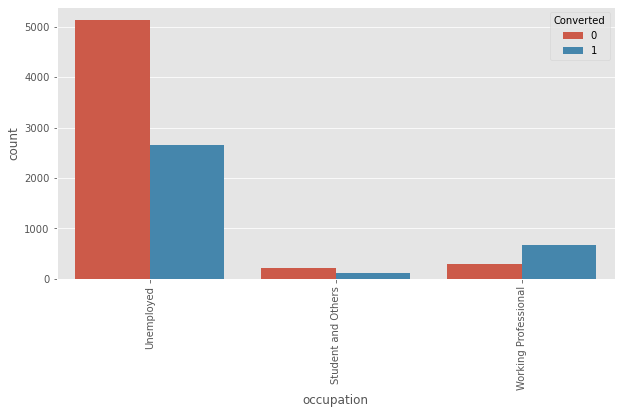

In [854]:
# Occupation vs Converted
plt.figure(figsize=(10,5))
s1=sns.countplot(leads.occupation, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Although, unemployed category has highest lead conversion, the company can target working professionals promoting a promising career growth.

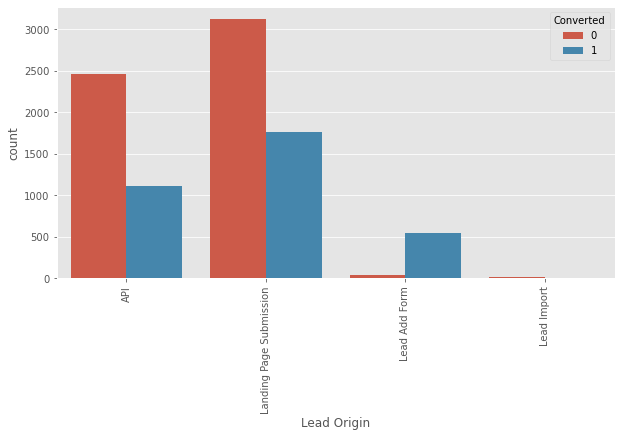

In [855]:
# Lead Origin Vs Converted
plt.figure(figsize=(10,5))
s1=sns.countplot(leads["Lead Origin"], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- We have a lot of scope of improving the lead score using Ad campaigns even though the website performance is quite good.
- There is also a chance of improving the lead generation and lead conversion using APIs.

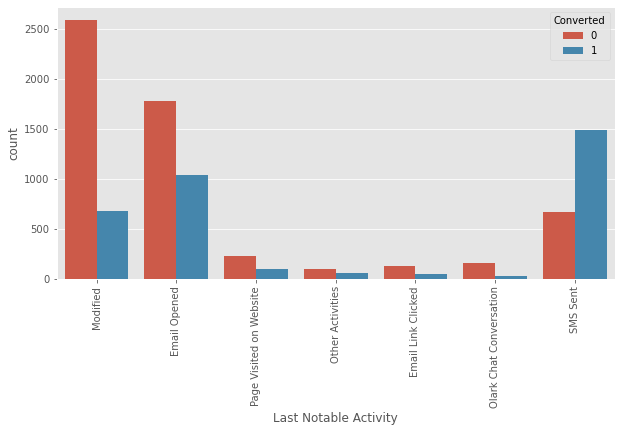

In [856]:
# Last Notable Activity Vs Converted
plt.figure(figsize=(10,5))
s1=sns.countplot(leads["Last Notable Activity"], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- As we can see, SMS and Emials opend has shown quite good conversion.
- However, we sould suggest to improve the 'Olark Chat Conversation' and 'Page Visited Website' conversion rate.

**Let's look at the Numerical Features of our dataset once**

In [857]:
# Let's check our target variable 'Converted'
# How many 1s - Conversion Happened and How many 0s - Conversion didn't happen
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

- Around 38% of values in 'Converted' column are 1s.

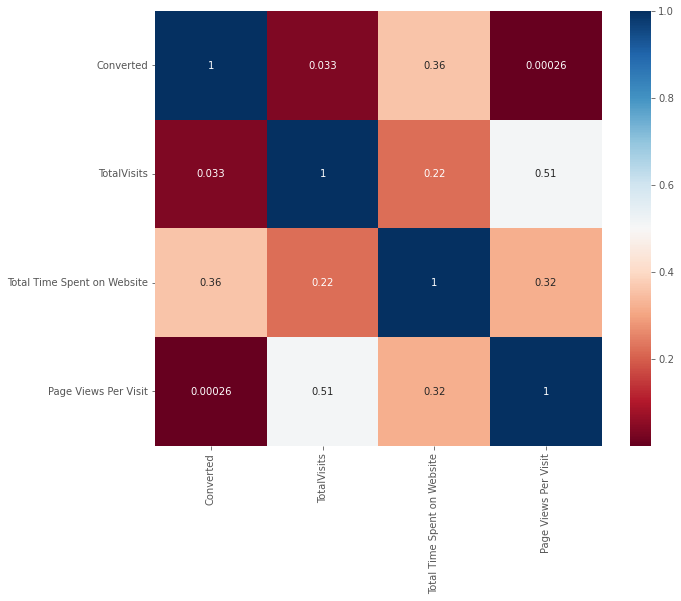

In [858]:
# Let's Check the correlations among numerical features once
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="RdBu", annot=True)
plt.show()

- It is quite evident that 'Total Visits' and 'Page View Per Visit' has a bit high correlation than others which is expected.
- Also, 'Total Time Spent on Website' has a good correlation with our target feature 'Converted'.

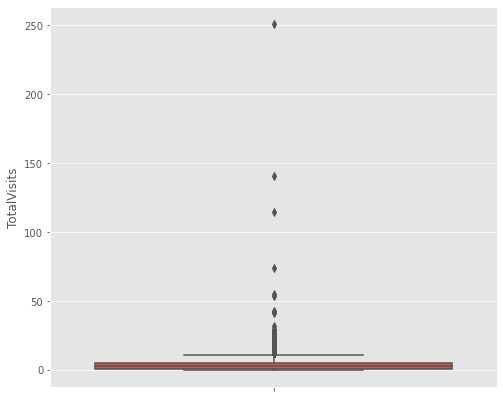

In [859]:
# 'Total Visits' Outlier check

plt.figure(figsize=(8,7))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

- We can see, there are a few outliers present here.

In [860]:
# Let's check the percentile values for "Total Visits" mentioning percentiles values

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

- The 'max' value is 251, where as the '99%' value is 17, there is a huge gap in between.
- Suggests the presence of outliers.

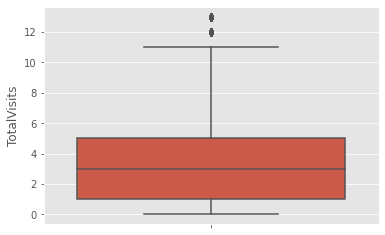

In [861]:
#Outlier Treatment: Let's Remove the top & the bottom 2% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.98)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.02)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [862]:
#Let's check the percentiles again
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8900.000000
mean        3.094719
std         2.745061
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        12.000000
max        13.000000
Name: TotalVisits, dtype: float64

- Now, we have a pretty good and balanced distribution of percentile values. 

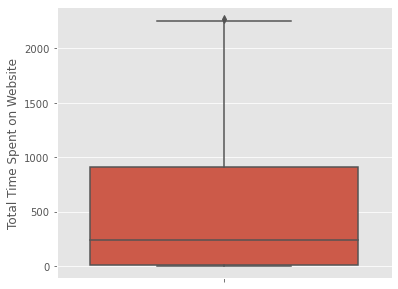

In [863]:
# 'Total Time Spent on Website' Outlier check

plt.figure(figsize=(6,5))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

In [864]:
# Let's check percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8900.000000
mean      477.797416
std       543.539000
min         0.000000
5%          0.000000
25%         6.750000
50%       241.000000
75%       908.000000
90%      1369.100000
95%      1552.000000
99%      1837.020000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

- As, it is evident that there are no major Outliers for the above feature we don't need to perform any Outlier Treatment for this above Column.

In [865]:
#checking spread of "Page Views Per Visit" with percentiles distribution

leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8900.000000
mean        2.310474
std         1.992907
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        13.000000
Name: Page Views Per Visit, dtype: float64

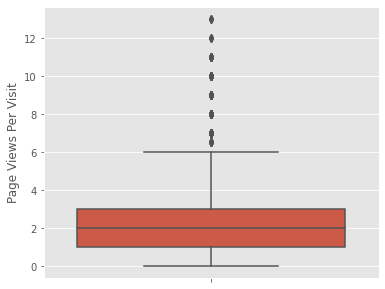

In [866]:
# 'Page Views Per Visit' Outlier check

plt.figure(figsize=(6,5))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

- There are outliers present in the above column.
- Outlier Treatment: Let's Remove the top & the bottom 2% of the Column Outlier values

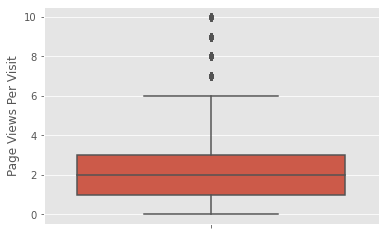

In [867]:
# Outlier treatment
Q3 = leads.TotalVisits.quantile(0.97)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.03)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

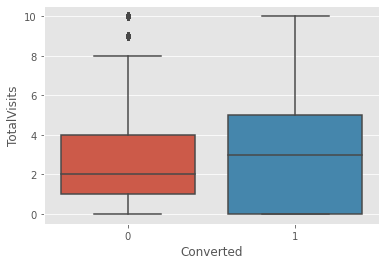

In [868]:
# Let's check "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

##### Insight:

- Median for converted and not converted leads are close.
- Leads having 'Total Visits' around 3-4 times seems to have converted better.
- Still, we can't be sure at this moment.

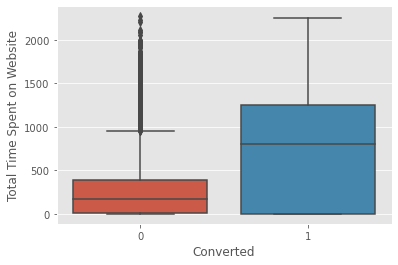

In [869]:
# Let's check "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

##### Insight:

- Evidently, leads who have spent more time on website have a higher rate of converting.
- If the company would improve website content and enagagement on website, there would be more leads converting.

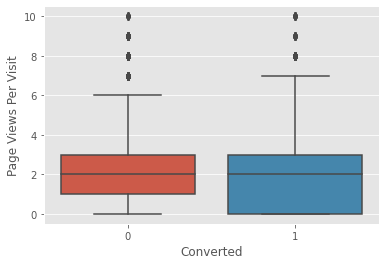

In [870]:
# Let's check "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

##### Insight:

- The median of both converted and non-converted are on the same level.
- We can't be certain about the interpretation on lead conversion here.

In [871]:
# let's check the shape of our dataset
leads.shape

(8721, 10)

In [872]:
# Let's check the percentage of rows that we have retained after outlier treatment.
print(len(leads.index))
print(len(leads.index)/9240)

8721
0.9438311688311688


##### Insight:
- After the data cleaning and outlier treatment we have 8721 rows and 10 columns.
- After the null value imputation and the outlier treatment we have retained 94% of the original data.
- Now, we can move on and start with our next step, Data Preparation.

### Step 4: Data Preparation:

##### Let's start with Dummy Variable Creation

In [873]:
# Let's look at all the categorical features we have
# Then, create an instance and save them together
cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Specialization', 'occupation', 'City',
       'Last Notable Activity'],
      dtype='object')

In [874]:
# Let's Create dummy variables using the 'get_dummies' command for our cactegorical variables
# We shall also drop the first dummy column to avoid multicollinearity
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Specialization', 'Last Notable Activity',
                              'occupation','City']], drop_first=True)

# Let's concat the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [875]:
# Let's check our dataframe
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,occupation,City,Last Notable Activity,...,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,occupation_Unemployed,occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities
0,API,Olark Chat,0,0.0,0,0.0,Industry Specializations,Unemployed,Mumbai,Modified,...,0,1,0,0,0,0,1,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Management Specializations,Unemployed,Mumbai,Email Opened,...,1,0,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Specializations,Student and Others,Mumbai,Email Opened,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Industry Specializations,Unemployed,Mumbai,Modified,...,0,1,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Management Specializations,Unemployed,Mumbai,Modified,...,0,1,0,0,0,0,1,0,0,0


In [876]:
# Now, let's Drop the variables for which the dummy variables have been created

leads.drop(cat_cols,1,inplace = True)
# checking the dataframe again
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,occupation_Unemployed,occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [877]:
# Let's check the basic info of our dataframe again
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8721 entries, 0 to 9239
Data columns (total 39 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Converted                                      8721 non-null   int64  
 1   TotalVisits                                    8721 non-null   float64
 2   Total Time Spent on Website                    8721 non-null   int64  
 3   Page Views Per Visit                           8721 non-null   float64
 4   Lead Origin_Landing Page Submission            8721 non-null   uint8  
 5   Lead Origin_Lead Add Form                      8721 non-null   uint8  
 6   Lead Origin_Lead Import                        8721 non-null   uint8  
 7   Lead Source_Direct Traffic                     8721 non-null   uint8  
 8   Lead Source_Facebook                           8721 non-null   uint8  
 9   Lead Source_Google                             8721 

##### Let's move on to Splitting the dataset into Train and Test Data Set

In [878]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split

In [879]:
# Assigning target variable to y
y = leads['Converted']

# Putting Rest of the features in X
X=leads.drop('Converted', axis=1)

In [880]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [881]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6104 entries, 7220 to 5991
Data columns (total 38 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   TotalVisits                                    6104 non-null   float64
 1   Total Time Spent on Website                    6104 non-null   int64  
 2   Page Views Per Visit                           6104 non-null   float64
 3   Lead Origin_Landing Page Submission            6104 non-null   uint8  
 4   Lead Origin_Lead Add Form                      6104 non-null   uint8  
 5   Lead Origin_Lead Import                        6104 non-null   uint8  
 6   Lead Source_Direct Traffic                     6104 non-null   uint8  
 7   Lead Source_Facebook                           6104 non-null   uint8  
 8   Lead Source_Google                             6104 non-null   uint8  
 9   Lead Source_Live Chat                          61

**Scaling the columns**

In [882]:
# scaling the numeric columns in train data set
# Let's import necessary libraries
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,occupation_Unemployed,occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities
7220,0.436186,2.091938,0.918347,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3383,0.028331,0.230687,0.391804,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
770,0.436186,-0.244329,0.918347,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
5785,-1.195236,-0.876452,-1.187826,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
5252,1.251898,-0.464278,-0.134740,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


### Step 5: Model Building:

**Using statsmodel and RFE for model building here**

In [883]:
# Importing necessary libraries
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# We shall use RFE for selecting features that are most relevant in predicting the target variable
from sklearn.feature_selection import RFE

# We want 15 most reelevant columns here
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [884]:
# Let's see all the 15 chosen columns in a zipped list with their ranks
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 13),
 ('Lead Source_NC_EDM', False, 9),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 12),
 ('Lead Source_Press_Release', False, 14),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 11),
 ('Lead Source_blog', False, 24),
 ('Lead Source_google', False, 17),
 ('Lead Source_testone', False, 10),
 ('Lead Source_welearnblog_Home', True, 1),
 ('Lead Source_y

**All the columns with value True and 1 have been selected among the most relevant 15 features**

In [885]:
# let's list the RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_welearnblog_Home', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'occupation_Working Professional'],
      dtype='object')

- Out of 38 columns now we have above 15 columns.
- Rest of the columns have been dropped from train dataset.

**Model 1**

In [886]:
# Let's Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6088
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2700.5
Date:                Sun, 29 May 2022   Deviance:                       5401.0
Time:                        17:32:27   Pearson chi2:                 6.27e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3078      0.092     -3.344      0.001      -0.488      -0.127
Total Time Spent on Website                       1.0947      0.039     27.765      0.000       1.017       1.172
Lead Origin_Lead Add Form                         1.0490      0.993      1.057      0.291      -0.897       2.995
Lead Origin_Lead Import                           0.4888      0.489      0.999      0.318      -0.470       1.448
Lead Source_Direct Traffic                       -1.2229      0.111    -11.051      0.000      -1.440      -1.006
Lead Source_Google                               -0.7530      0.106     -7.114      0.000      -0.960      -0.545
Lead Source_Organic Search                       -0.9652      0.131     -7.342      0.000      -1.223      -0.708
Lead Source_Reference                             2.4461      1.020      2.397      0.017       0.446       4.446
Lead Source_Referral Sites                       -0.9638      0.321     -3.005      0.003      -1.592      -0.335
Lead Source_Social Media                          0.9211      1.528      0.603      0.547      -2.074       3.916
Lead Source_Welingak Website                      4.5326      1.416      3.202      0.001       1.758       7.307
Lead Source_welearnblog_Home                    -20.0434   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Last Notable Activity_Modified                   -0.7728      0.082     -9.448      0.000      -0.933      -0.612
Last Notable Activity_Olark Chat Conversation    -1.7023      0.321     -5.305      0.000      -2.331      -1.073
Last Notable Activity_SMS Sent                    1.4331      0.085     16.856      0.000       1.266       1.600
occupation_Working Professional                   1.4143      0.111     12.777      0.000       1.197       1.631
=================================================================================================================
"""

- p-value for 'Lead Source_welearnblog_Home' is high. Let's drop it

In [887]:
#dropping column with high p-value

col = col.drop('Lead Source_welearnblog_Home',1)

**Model 2**

In [888]:
# Let's build model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6089
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.0
Date:                Sun, 29 May 2022   Deviance:                       5402.0
Time:                        17:32:27   Pearson chi2:                 6.27e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3109      0.092     -3.379      0.001      -0.491      -0.131
Total Time Spent on Website                       1.0943      0.039     27.762      0.000       1.017       1.172
Lead Origin_Lead Add Form                         1.0513      0.993      1.059      0.290      -0.895       2.997
Lead Origin_Lead Import                           0.4912      0.489      1.004      0.315      -0.468       1.450
Lead Source_Direct Traffic                       -1.2203      0.111    -11.032      0.000      -1.437      -1.003
Lead Source_Google                               -0.7504      0.106     -7.092      0.000      -0.958      -0.543
Lead Source_Organic Search                       -0.9627      0.131     -7.325      0.000      -1.220      -0.705
Lead Source_Reference                             2.4458      1.020      2.397      0.017       0.446       4.446
Lead Source_Referral Sites                       -0.9612      0.321     -2.998      0.003      -1.590      -0.333
Lead Source_Social Media                          0.9231      1.528      0.604      0.546      -2.072       3.918
Lead Source_Welingak Website                      4.5323      1.415      3.202      0.001       1.758       7.307
Last Notable Activity_Modified                   -0.7716      0.082     -9.435      0.000      -0.932      -0.611
Last Notable Activity_Olark Chat Conversation    -1.7002      0.321     -5.298      0.000      -2.329      -1.071
Last Notable Activity_SMS Sent                    1.4341      0.085     16.868      0.000       1.267       1.601
occupation_Working Professional                   1.4148      0.111     12.782      0.000       1.198       1.632
=================================================================================================================
"""

- p-value for 'Lead Source_Social Media' is high. Let's drop it.

In [889]:
#dropping column with high p-value

col = col.drop('Lead Source_Social Media',1)

**Model 3**

In [890]:
# Let's build model 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6090
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.2
Date:                Sun, 29 May 2022   Deviance:                       5402.3
Time:                        17:32:27   Pearson chi2:                 6.27e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3088      0.092     -3.359      0.001      -0.489      -0.129
Total Time Spent on Website                       1.0949      0.039     27.778      0.000       1.018       1.172
Lead Origin_Lead Add Form                         1.0490      0.993      1.057      0.291      -0.897       2.995
Lead Origin_Lead Import                           0.4893      0.489      1.000      0.317      -0.470       1.448
Lead Source_Direct Traffic                       -1.2229      0.111    -11.065      0.000      -1.440      -1.006
Lead Source_Google                               -0.7531      0.106     -7.125      0.000      -0.960      -0.546
Lead Source_Organic Search                       -0.9654      0.131     -7.350      0.000      -1.223      -0.708
Lead Source_Reference                             2.4459      1.020      2.397      0.017       0.446       4.446
Lead Source_Referral Sites                       -0.9639      0.321     -3.006      0.003      -1.592      -0.335
Lead Source_Welingak Website                      4.5323      1.415      3.202      0.001       1.758       7.307
Last Notable Activity_Modified                   -0.7703      0.082     -9.424      0.000      -0.931      -0.610
Last Notable Activity_Olark Chat Conversation    -1.7013      0.321     -5.302      0.000      -2.330      -1.072
Last Notable Activity_SMS Sent                    1.4342      0.085     16.869      0.000       1.268       1.601
occupation_Working Professional                   1.4142      0.111     12.778      0.000       1.197       1.631
=================================================================================================================
"""

p-value for 'Lead Origin_Lead Import' is high. Let's drop it.

In [891]:
#dropping column with high p-value
col = col.drop('Lead Origin_Lead Import',1)

**Model 4**

In [892]:
# Let's build model 4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6091
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.6
Date:                Sun, 29 May 2022   Deviance:                       5403.3
Time:                        17:32:28   Pearson chi2:                 6.27e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.2967      0.091     -3.260      0.001      -0.475      -0.118
Total Time Spent on Website                       1.0945      0.039     27.771      0.000       1.017       1.172
Lead Origin_Lead Add Form                         1.0386      0.993      1.046      0.295      -0.907       2.984
Lead Source_Direct Traffic                       -1.2332      0.110    -11.214      0.000      -1.449      -1.018
Lead Source_Google                               -0.7634      0.105     -7.262      0.000      -0.969      -0.557
Lead Source_Organic Search                       -0.9755      0.131     -7.453      0.000      -1.232      -0.719
Lead Source_Reference                             2.4457      1.020      2.397      0.017       0.446       4.445
Lead Source_Referral Sites                       -0.9746      0.320     -3.042      0.002      -1.603      -0.347
Lead Source_Welingak Website                      4.5325      1.415      3.202      0.001       1.758       7.307
Last Notable Activity_Modified                   -0.7730      0.082     -9.463      0.000      -0.933      -0.613
Last Notable Activity_Olark Chat Conversation    -1.7095      0.321     -5.331      0.000      -2.338      -1.081
Last Notable Activity_SMS Sent                    1.4310      0.085     16.848      0.000       1.265       1.598
occupation_Working Professional                   1.4143      0.111     12.782      0.000       1.197       1.631
=================================================================================================================
"""

- p-value for 'Lead Origin_Lead Add Form' is high. We can drop it too.

In [893]:
#dropping column with high p-value
col = col.drop('Lead Origin_Lead Add Form',1)

**Model 5**

In [894]:
# Let's build model 5
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6092
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.2
Date:                Sun, 29 May 2022   Deviance:                       5404.4
Time:                        17:32:28   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.2895      0.091     -3.193      0.001      -0.467      -0.112
Total Time Spent on Website                       1.0955      0.039     27.807      0.000       1.018       1.173
Lead Source_Direct Traffic                       -1.2409      0.110    -11.313      0.000      -1.456      -1.026
Lead Source_Google                               -0.7709      0.105     -7.354      0.000      -0.976      -0.565
Lead Source_Organic Search                       -0.9832      0.131     -7.525      0.000      -1.239      -0.727
Lead Source_Reference                             3.4783      0.257     13.540      0.000       2.975       3.982
Lead Source_Referral Sites                       -0.9820      0.320     -3.065      0.002      -1.610      -0.354
Lead Source_Welingak Website                      5.5652      1.014      5.487      0.000       3.577       7.553
Last Notable Activity_Modified                   -0.7735      0.082     -9.470      0.000      -0.934      -0.613
Last Notable Activity_Olark Chat Conversation    -1.7138      0.321     -5.345      0.000      -2.342      -1.085
Last Notable Activity_SMS Sent                    1.4322      0.085     16.862      0.000       1.266       1.599
occupation_Working Professional                   1.4130      0.111     12.770      0.000       1.196       1.630
=================================================================================================================
"""

- Now, the p-values look okay. we can now move on and calculate VIF to check the correlation between the variables.

In [895]:
# Let's import VIF calculation library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [896]:
# Let's Create a dataframe that will contain the names of all the feature variables available and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_Modified,1.58
9,Last Notable Activity_SMS Sent,1.48
2,Lead Source_Google,1.47
1,Lead Source_Direct Traffic,1.37
3,Lead Source_Organic Search,1.20
0,Total Time Spent on Website,1.17
4,Lead Source_Reference,1.16
10,occupation_Working Professional,1.15
6,Lead Source_Welingak Website,1.03
5,Lead Source_Referral Sites,1.01


- As we can see, all the values seem to be in order, so, let's move on to derive the Probabilities, Lead Score, Predictions on Train Data.

In [897]:
# Let's get the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7220    0.681637
3383    0.601622
770     0.526006
5785    0.993781
5252    0.352790
9123    0.129733
226     0.243062
6352    0.356465
653     0.070842
2010    0.981696
dtype: float64

In [898]:
# Let's Reshape it into an 'Array'
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.68163672, 0.60162159, 0.52600602, 0.99378077, 0.35278976,
       0.12973277, 0.24306213, 0.356465  , 0.07084219, 0.98169587])

In [899]:
# Let's Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,1,0.681637
1,0,0.601622
2,0,0.526006
3,1,0.993781
4,1,0.352790


In [900]:
# Let's create a column 'predicted' with 1 if Converted_prob > 0.5 else, 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the first five records
y_train_pred_final.head()

,Converted,Converted_prob,Predicted
0,1,0.681637,1
1,0,0.601622,1
2,0,0.526006,1
3,1,0.993781,1
4,1,0.352790,0


### Step 6: Model Evaluation : Train Dataset


In [901]:
# let's improt metrics library
from sklearn import metrics

# Let's create the Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3353  456]
 [ 778 1517]]


- So, the result of confusion matrix is 3353 True Negative, 1517 True Positive , 778 False Negative and 456 False Positive. 

In [913]:
# Let's check the overall accuracy.
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
acc

0.7978374836173001

**Accuracy is around 80%**

In [ ]:
#let's check the sensitivity now.

In [904]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [905]:
sens = TP / float(TP+FN)
sens

0.6610021786492375

**Sensitivity is 66%**

In [906]:
# Let us calculate specificity
spec = TN / float(TN+FP)
spec

0.8802835389866107

**Specificity is 88%**

In [907]:
# Let's now Calculate False Postive Rate - predicting conversion when customer does not convert
print(FP/ float(TN+FP))

0.11971646101338934


**False positive rate is 11%**

In [908]:
# Let's calculate positive predictive value 
print (TP / float(TP+FP))

0.7688798783578307


**Positive Predictive Value is 77%**

In [909]:
# Let's calculate Negative predictive value
print (TN / float(TN+ FN))

0.8116678770273541


**Negative Predictive Value is 81%**

#### Let's plot the ROC curve now.

In [910]:
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [911]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

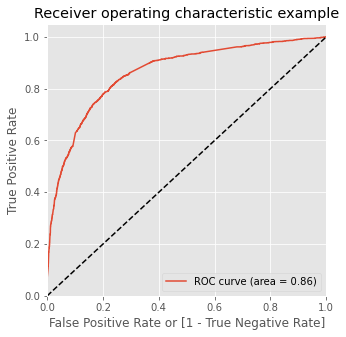

In [912]:
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

**The area under ROC curve should be maximum for a good predictive model and the value should lie between 0 to 1. Our ROC Curve area value is 0.86, that indicates our model to be a good predictive model.**

- Above we had chosen an arbitrary cut-off value of 0.5.
- We need to determine the best cut-off value. Let's do that.

In [914]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.681637,1,1,1,1,1,1,1,1,0,0,0
1,0,0.601622,1,1,1,1,1,1,1,1,0,0,0
2,0,0.526006,1,1,1,1,1,1,1,0,0,0,0
3,1,0.993781,1,1,1,1,1,1,1,1,1,1,1
4,1,0.352790,0,1,1,1,1,0,0,0,0,0,0


In [915]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.681637,1,1,1,1,1,1,1,1,0,0,0
1,0,0.601622,1,1,1,1,1,1,1,1,0,0,0
2,0,0.526006,1,1,1,1,1,1,1,0,0,0,0
3,1,0.993781,1,1,1,1,1,1,1,1,1,1,1
4,1,0.352790,0,1,1,1,1,0,0,0,0,0,0


In [916]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375983  1.000000  0.000000
0.1   0.1  0.534076  0.966885  0.273300
0.2   0.2  0.726081  0.907625  0.616697
0.3   0.3  0.780963  0.823965  0.755054
0.4   0.4  0.798165  0.745969  0.829614
0.5   0.5  0.797837  0.661002  0.880284
0.6   0.6  0.781291  0.538998  0.927278
0.7   0.7  0.770315  0.467538  0.952744
0.8   0.8  0.747870  0.376471  0.971646
0.9   0.9  0.706258  0.235730  0.989761


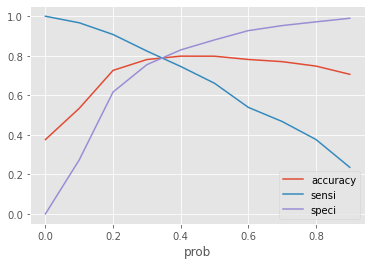

In [917]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the above plot we can assume that 0.3 can be considered to be the optimum cut-off probability**

In [918]:
# the column 'final_Predicted' will be assigned with 1 if Converted_prob > 0.3 else, 0
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.681637,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.601622,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.526006,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.993781,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.352790,0,1,1,1,1,0,0,0,0,0,0,1


In [920]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,final_Predicted,Lead_Score
0,1,0.681637,1,68
1,0,0.601622,1,60
2,0,0.526006,1,53
3,1,0.993781,1,99
4,1,0.352790,1,35


In [921]:
# Let's check the accuracy again
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7809633027522935

**Accuracy is 78%**

In [922]:
#Let's create another confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2876,  933],
       [ 404, 1891]], dtype=int64)

In [923]:
# assign variables so that we can calculate sensitivity, specificity etc
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [924]:
# Sensitivity
sensi = TP / float(TP+FN)
sensi

0.8239651416122005

**Sensitivity is 82%**

In [925]:
# Specificity
speci = TN / float(TN+FP)
speci

0.7550538199002362

**Specificity is 76%**

In [926]:
# Let's Calculate False Postive Rate - predicting conversion when customer does not convert
print(FP/ float(TN+FP))

0.2449461800997637


**False positive rate is 24%**

In [927]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6696175637393768


**Positive Predictive value is 67%**

In [928]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8768292682926829


**Negative predictive value is 88%**

In [932]:
# Let's import precision_score and recall_score library
from sklearn.metrics import precision_score, recall_score

In [933]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6696175637393768

In [934]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8239651416122005

**Precision is 70% and Recall is 83%**

In [935]:
# Let's plot precision and recall curve
from sklearn.metrics import precision_recall_curve

In [936]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

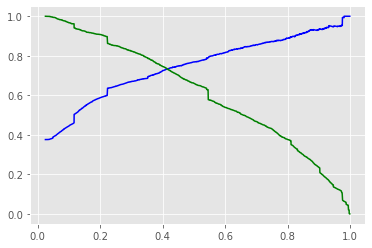

In [937]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "g-")
plt.show()

**Train Data Insights:** After evaluating the model on the Train Data the scores we obtained:

- Accuracy : 78%
- Sensitivity : 82%
- Specificity : 76%
- Precision : 70%
- Recall : 83%

### Step 7: Model Evaluation: Test Dataset

**Scaling the test dataset**

In [938]:
#Let's keep all numeric cols together like we did in training data set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,occupation_Unemployed,occupation_Working Professional,City_Non-Maharashtra Cities,City_Non-Mumbai Maharashtra Cities
1105,1.64316,-0.592118,0.630267,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
5872,-1.15070,-0.863670,-1.141766,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
480,-1.15070,-0.863670,-1.141766,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8055,-1.15070,-0.863670,-1.141766,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8214,-1.15070,-0.863670,-1.141766,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [939]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,occupation_Working Professional
1105,-0.592118,0,1,0,0,0,0,1,0,0,0
5872,-0.863670,0,0,0,0,0,1,0,0,1,0
480,-0.863670,0,0,0,0,0,0,0,0,0,0
8055,-0.863670,0,0,0,1,0,0,0,0,1,1
8214,-0.863670,0,0,0,0,0,0,1,0,0,0


In [940]:
#adding constant to X_test var
X_test_sm = sm.add_constant(X_test)

In [941]:
# assigning y_test_pred
y_test_pred = res.predict(X_test_sm)

In [942]:
y_test_pred[:10]

1105    0.077089
5872    0.996864
480     0.225198
8055    0.993867
8214    0.118247
4641    0.059011
5693    0.225198
3810    0.712582
430     0.090487
2085    0.986998
dtype: float64

In [943]:
# Let's Convert y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [944]:
# Let's see the first five records
y_pred_1.head()

,0
1105,0.077089
5872,0.996864
480,0.225198
8055,0.993867
8214,0.118247


In [945]:
# Let's Convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [946]:
# Let's Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [947]:
y_pred_final.head()

,Converted,0
1105,0,0.077089
5872,1,0.996864
480,0,0.225198
8055,1,0.993867
8214,0,0.118247


In [948]:
# Let's Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [949]:
y_pred_final.head()

,Converted,Converted_prob
1105,0,0.077089
5872,1,0.996864
480,0,0.225198
8055,1,0.993867
8214,0,0.118247


In [950]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,Converted_prob,Lead_Score
1105,0,0.077089,8
5872,1,0.996864,100
480,0,0.225198,23
8055,1,0.993867,99
8214,0,0.118247,12


In [951]:
# Let's apply the cut-off score 0.3 
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [952]:
#Let's check the dataset again
y_pred_final.head()

,Converted,Converted_prob,Lead_Score,final_Predicted
1105,0,0.077089,8,0
5872,1,0.996864,100,1
480,0,0.225198,23,0
8055,1,0.993867,99,1
8214,0,0.118247,12,0


In [953]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7756973633931983

**Accuracy is 78%**

In [954]:
#Let's check the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1216,  426],
       [ 161,  814]], dtype=int64)

In [955]:
# Let's assign values to TP, TN, FP and FN
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [956]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8348717948717949

**Sensitivity is 84%**

In [957]:
# Let us calculate specificity
TN / float(TN+FP)

0.7405602923264312

**Specificity is 74%**

In [958]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6564516129032258

**Precision is 66%**

In [959]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8348717948717949

**Recall score is 84%**

**Test Data Insights:**
After evaluating the model on the Test Dataset the scores we obtained:

- Accuracy : 78%
- Sensitivity : 84%
- Specificity : 74%
- Precision : 66%
- Recall : 83%

### Final Insights:

As we know, when we promote our online education program via many ad campaigns, search engine optimisation, blogging etc we end up with a huge number of leads. However,**only 38% of the whole dataset have 'Converted'** meaning only 38% of the total leads have enrolled with one or more of the online education programs. 

We, also, saw there are customers with various kind of occupations, for example - Working professionals, unemployed, Students etc who have enrolled for our program. Among those conversions, **most of our leads reside in Mumbai and are Unemployed**. Furthermore, they **found out** about the program **via Google ads and opted for specialization which falls under 'Management' category**.In addition to that, we also noticed the potential leads who **spend maximum time on the website had a high rate of conversion**.

We would suggest, to make the Company's **social media presence more prominent** and keep working on the **website content** which would result in **high engagement**. Also, the company could **assign high performing sales team** to be proactive in **Olark Chat** so that we can improve potential lead conversion on that platform as well. We can also, work on **targeting audience residing outside Maharashtra**, as company provides online education program and is suitable for everyone who wants to upskill in their career path.


Now, coming to our machine building and prediction part, If we compare the values obtained for Train & Test:

**Train Data:** 
Accuracy : 78%
Sensitivity : 82%
Specificity : 76%
Precision : 70%
Recall : 83%

**Test Data:**
Accuracy : 78%
Sensitivity : 84%
Specificity : 74%
Precision : 66%
Recall : 83%

The **score of Accuracy, Sensitivity and Accuracy in Train and Test data doesn't vary much**. Which means our **model can predict the conversion rate pretty decently** and we should be able to **give the CEO confidenc**e in making good calls based on this model's **'Hot Lead' prediction**.



**Submitted by:**
**Anugata Mahapatra** And **Bhavya Joshi**
 